In [22]:
from micrograd.nn import *

x = [2.0, 3.0]
n = Neuron(2)
n(x)

Value(data=0.9005346020500438)

In [23]:
x = [2.0, 3.0]
n = Layer(2, 3)
n(x)

[Value(data=0.7428652955008311),
 Value(data=0.29783800102695),
 Value(data=0.9385915862637555)]

In [24]:
x = [2.0, 3.0, -1.0]
n = MLP(3, [4, 4, 1])
n(x)
len(n.parameters())
# draw_dot(n(x))

41

In [25]:
xs = [
    [2.0, 3.0, -1.0],
    [3.0, -1.0, 0.5],
    [0.5, 1.0, 1.0],
    [1.0, 1.0, -1.0]
]

ys = [1.0, -1.0, -1.0, 1.0]
ypred = [n(x) for x in xs]
ypred

[Value(data=-0.6969118746068925),
 Value(data=-0.7801095435269436),
 Value(data=-0.7577210538036923),
 Value(data=-0.752643509981072)]

In [26]:
loss = sum([(ygout - ygt) ** 2 for ygout, ygt in zip(ys, ypred)])
loss

Value(data=6.058320083878573)

In [27]:
loss.backward()

In [28]:
n.layers[0].neurons[0].w[0].data

0.16288638416791668

In [29]:
n.layers[0].neurons[0].w[0].grad

-0.023692190557156958

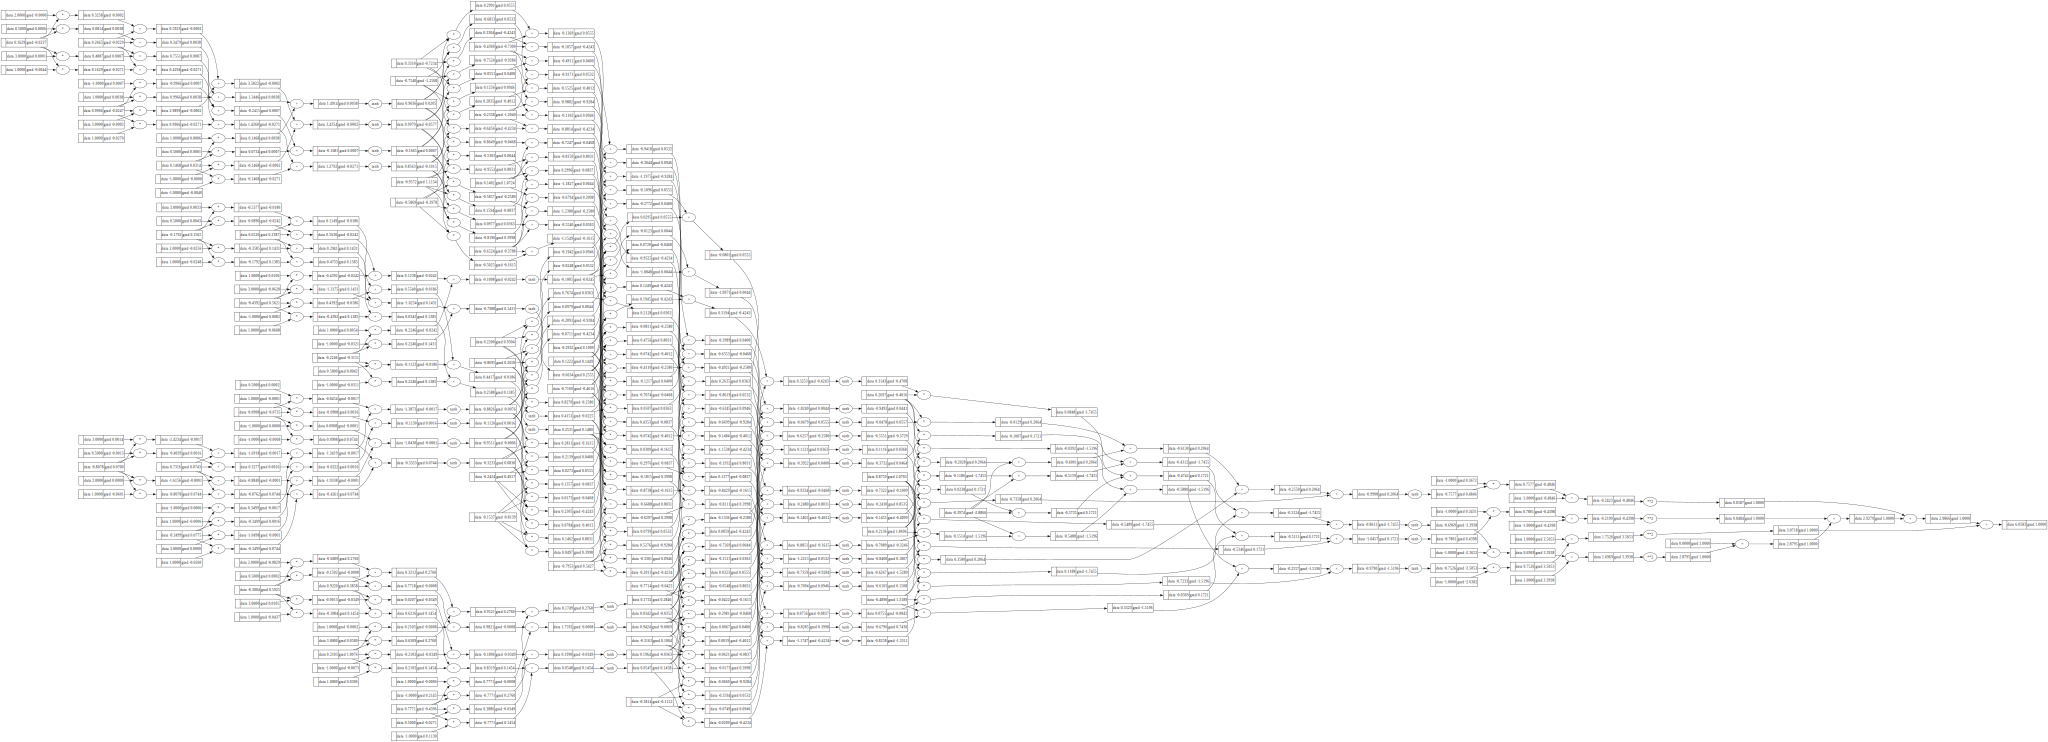

In [30]:
draw_dot(loss)

In [31]:
lr = 0.01
for p in n.parameters():
    p.data += lr * -p.grad


In [32]:
n.layers[0].neurons[0].w[0].data

0.16312330607348824

In [34]:
ypred = [n(x) for x in xs]
loss = sum([(ygout - ygt) ** 2 for ygout, ygt in zip(ys, ypred)])
loss

Value(data=5.747235987984686)